In [3]:
from class_magnesium import *

### Random Forest Classifier

Feature reduction: 361 -> 130


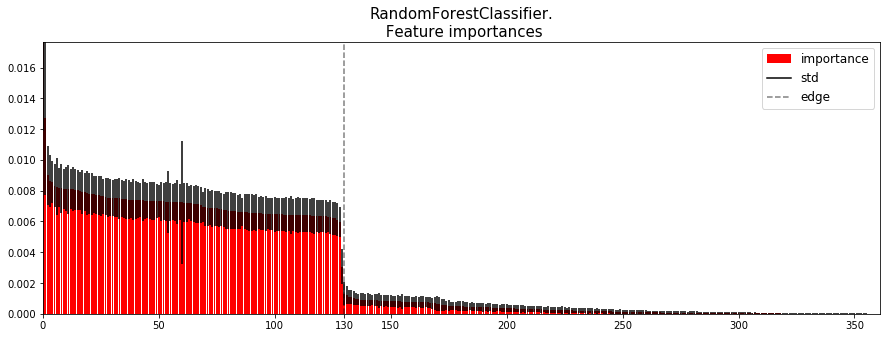

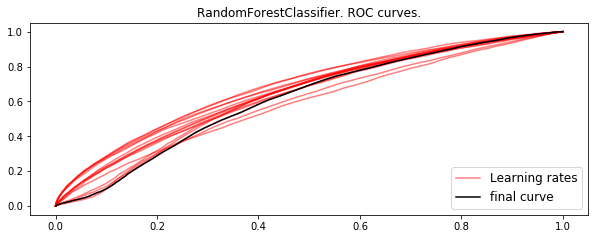

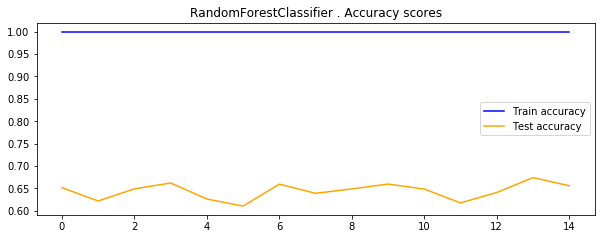

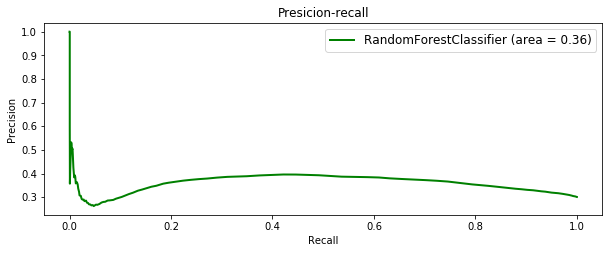

0.65611571516267653

In [61]:
rfc = Magnesium("set_minresol_N_7.csv")
rfc.compute(n_splits = 15)

### LinearDiscriminantAnalysis

C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


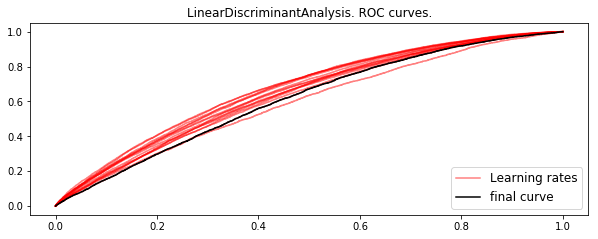

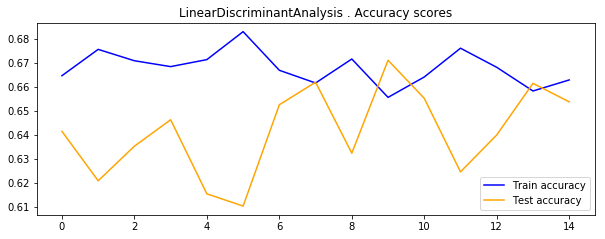

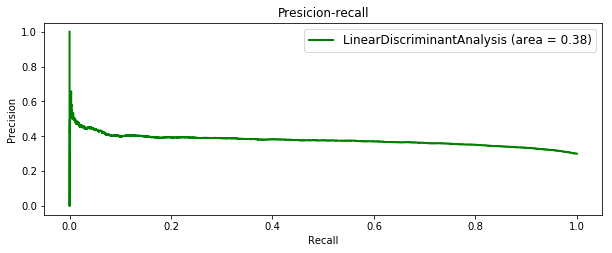

0.65373695518723141

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_svd = Magnesium("set_minresol_N_7.csv", LinearDiscriminantAnalysis(solver = 'svd', tol = 0.06))
lda_svd.compute(n_splits = 15,reduce_features = False)

### QDA

C:\Users\tikho\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


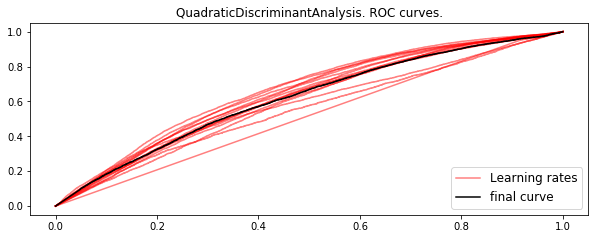

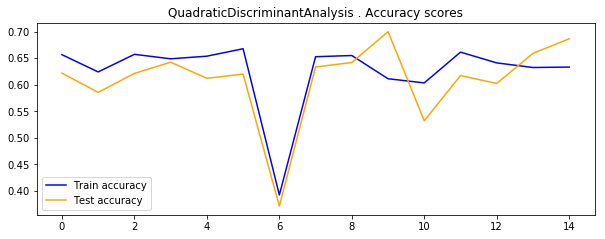

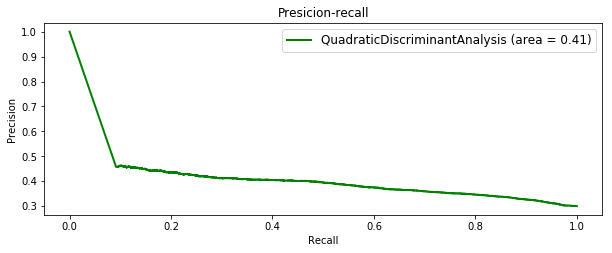

0.68673265807243711

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = Magnesium("set_minresol_N_7.csv", QuadraticDiscriminantAnalysis())
qda.compute(n_splits = 15,reduce_features = False)

### Xgboost

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 319.1min
[Parallel(n_jobs=2)]: Done  54 out of  54 | elapsed: 391.0min finished


The best parameters are {'max_depth': 10, 'n_estimators': 300, 'learning_rate': 0.09} with a score of 0.69



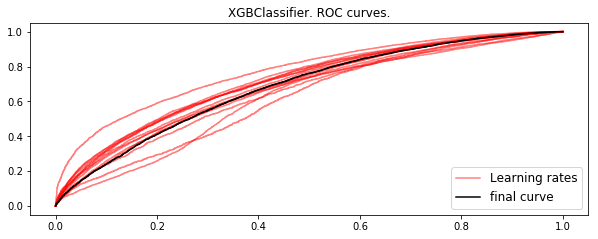

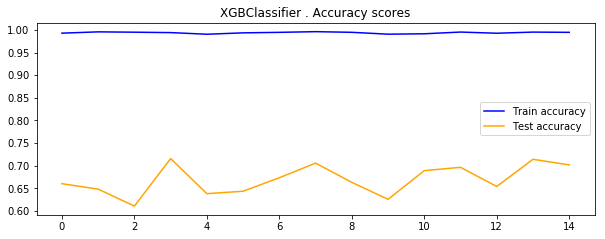

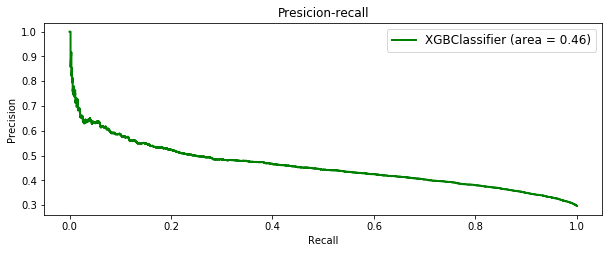

0.70164013506994694

In [24]:
import xgboost

xgb = Magnesium("set_minresol_N_7.csv", xgboost.XGBClassifier())
xgb.gridsearch({'max_depth':[10, 60], 'learning_rate':[0.01, 0.09,0.3], 'n_estimators':[50,200,300]})
xgb.fit_predict(n_splits = 15, redundant = False, gridsearched = True)

### XGBoost

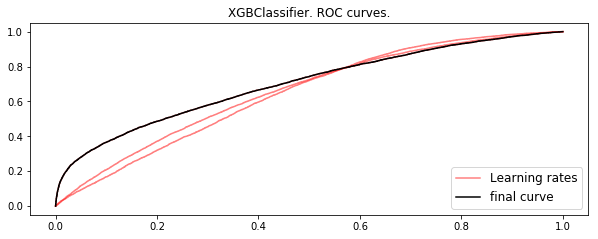

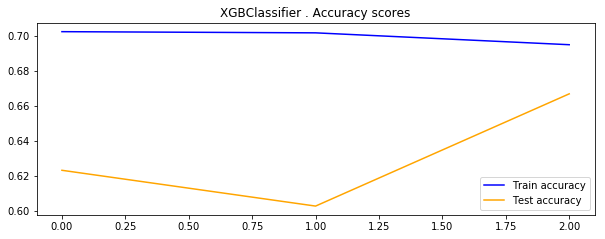

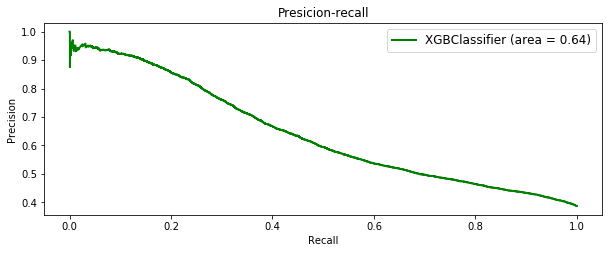

0.6669709417313251

In [22]:
import xgboost

xgb = Magnesium("set_minresol_N_7.csv", xgboost.XGBClassifier())
xgb.compute(n_splits = 3,reduce_features = False)

### Adaboost

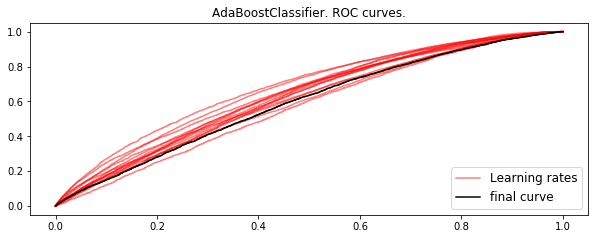

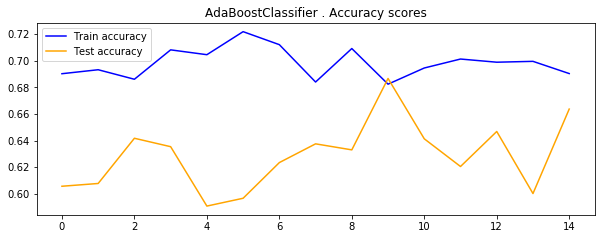

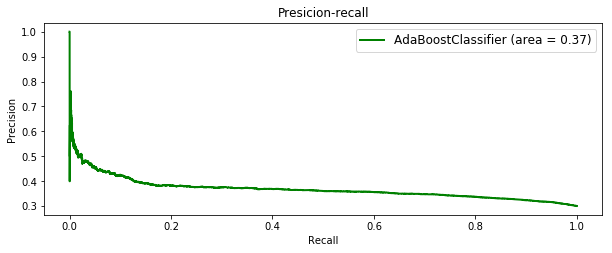

0.66363566605279312

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada = Magniy("set_minresol_N_7.csv", AdaBoostClassifier())
ada.compute(n_splits = 15,reduce_features = False)

### General plot

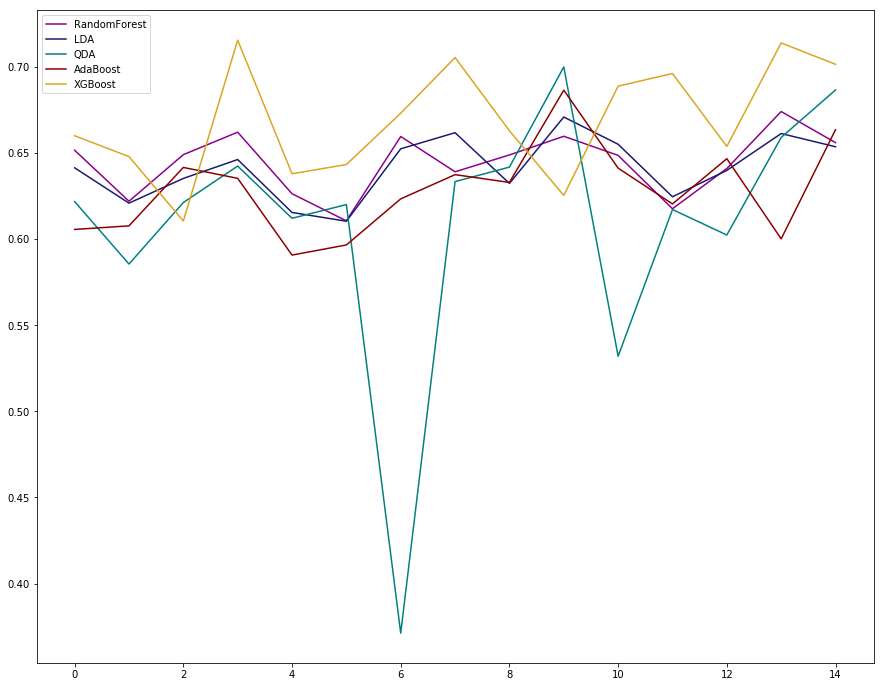

In [64]:
ax = plt.figure(figsize = (15, 12)).add_subplot(111)
ax.plot(list(range(15)), rfc.test_score, color = 'darkmagenta', label = 'RandomForest')
ax.plot(list(range(15)), lda_svd.test_score, color = 'midnightblue', label = 'LDA')
ax.plot(list(range(15)), qda.test_score, color = 'teal', label = 'QDA')
ax.plot(list(range(15)), ada.test_score, color = 'darkred', label = 'AdaBoost')
ax.plot(list(range(15)), xgb.test_score, color = 'goldenrod', label = 'XGBoost')
ax.legend()
plt.show()